In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('M:\Car_Dheko\cleaned_data.csv')
pd.set_option('display.max_columns', None)
df.head(2)

,Insurance Validity,Fuel Type,Engine Displacement,Year of Manufacture,ft,bt,transmission,ownerNo,oem,model,Wheel Size,Color,No of Cylinder,Fuel Suppy System,Turbo Charger,Length,Width,Height,Wheel Base,Gear Box,Drive Type,Seating Capacity,Steering Type,Tyre Type,No Door Numbers,Cargo Volumn,Mileage,Value Configuration,Super Charger,Turning Radius,City,price_in_lakhs,km_winsorized,price_in_lakhs_winzorized
0,Third Party insurance,Petrol,998 cc,2015.0,Petrol,Hatchback,Manual,3,Maruti,Maruti Celerio,15.0,White,3.0,MPFi,No,3715.0,1635.0,1565.0,2425.0,5 Speed,FWD,5.0,Power,"tubeless,radial",5.0,235.0,23.1,DOHC,No,4.7,Bangalore,4.00,11.563955,4.00
1,Comprehensive,Petrol,1497 cc,2018.0,Petrol,SUV,Manual,2,Ford,Ford Ecosport,16.0,White,3.0,Direct Injection,No,3998.0,1765.0,1647.0,2519.0,5 Speed,FWD,5.0,Power,"tubeless,radial",4.0,352.0,17.0,DOHC,No,5.3,Bangalore,8.11,10.395344,8.11


## Numerical vs Numerical

In [2]:
numerical_cols = df.select_dtypes(include=[np.number]).columns

numerical_cols

Index(['Year of Manufacture', 'ownerNo', 'Wheel Size', 'No of Cylinder',
       'Length', 'Width', 'Height', 'Wheel Base', 'Seating Capacity',
       'No Door Numbers', 'Cargo Volumn', 'Mileage', 'Turning Radius',
       'price_in_lakhs', 'km_winsorized', 'price_in_lakhs_winzorized'],
      dtype='object')

In [7]:
df['Seating Capacity'].value_counts()

Seating Capacity
5.0     7350
7.0      728
6.0      103
4.0       93
8.0       62
9.0       11
2.0        7
10.0       5
Name: count, dtype: int64

In [3]:
df['km_winsorized'].corr(df['price_in_lakhs_winzorized'])

np.float64(-0.2820186809070669)

In [8]:
actual_numerical_cols = ['Wheel Size','Length','Width','Height','Wheel Base','Cargo Volumn','Mileage',
                         'Turning Radius','km_winsorized','price_in_lakhs_winzorized']

In [9]:
for i in actual_numerical_cols:
    corr = df['price_in_lakhs_winzorized'].corr(df[i])
    print(f'Corr {i} :', corr)

Corr Wheel Size : 0.7251987213007638
Corr Length : 0.6632795435202026
Corr Width : 0.705068760360889
Corr Height : 0.3315881858988279
Corr Wheel Base : 0.6991702038953377
Corr Cargo Volumn : 0.11492484041422325
Corr Mileage : -0.3787071479199668
Corr Turning Radius : 0.017606847697566406
Corr km_winsorized : -0.28201868090706683
Corr price_in_lakhs_winzorized : 1.0


In [11]:
df['Wheel Size'].corr(df['Wheel Base'])

np.float64(0.7499061156863792)

In [10]:
df['Width'].corr(df['Length'])

np.float64(0.7898975061289734)

In [14]:
corr_df = df[actual_numerical_cols].corr()
corr_df

,Wheel Size,Length,Width,Height,Wheel Base,Cargo Volumn,Mileage,Turning Radius,km_winsorized,price_in_lakhs_winzorized
Wheel Size,1.000000,0.723582,0.833802,0.370823,0.749906,0.125404,-0.329249,0.027051,-0.130394,0.725199
Length,0.723582,1.000000,0.789898,0.240192,0.920054,0.163800,-0.504833,0.050220,0.047462,0.663280
Width,0.833802,0.789898,1.000000,0.314139,0.812143,0.145282,-0.408953,0.023360,-0.031235,0.705069
Height,0.370823,0.240192,0.314139,1.000000,0.315547,0.012307,-0.288324,0.034584,-0.019267,0.331588
Wheel Base,0.749906,0.920054,0.812143,0.315547,1.000000,0.125641,-0.477465,0.059048,-0.008189,0.699170
Cargo Volumn,0.125404,0.163800,0.145282,0.012307,0.125641,1.000000,-0.093367,-0.964723,0.023152,0.114925
Mileage,-0.329249,-0.504833,-0.408953,-0.288324,-0.477465,-0.093367,1.000000,-0.009626,0.000848,-0.378707
Turning Radius,0.027051,0.050220,0.023360,0.034584,0.059048,-0.964723,-0.009626,1.000000,-0.011933,0.017607
km_winsorized,-0.130394,0.047462,-0.031235,-0.019267,-0.008189,0.023152,0.000848,-0.011933,1.000000,-0.282019
price_in_lakhs_winzorized,0.725199,0.663280,0.705069,0.331588,0.699170,0.114925,-0.378707,0.017607,-0.282019,1.000000


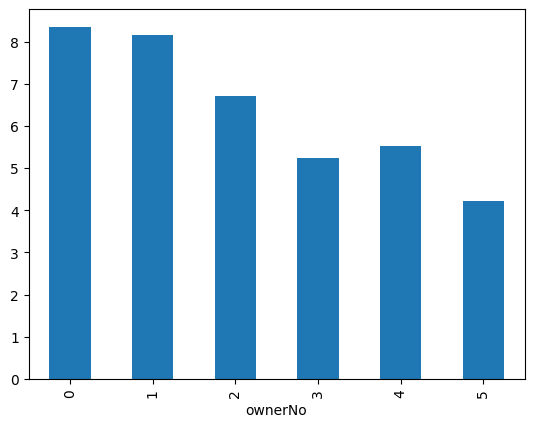

In [13]:
df.groupby(['ownerNo'])['price_in_lakhs_winzorized'].mean().plot.bar();

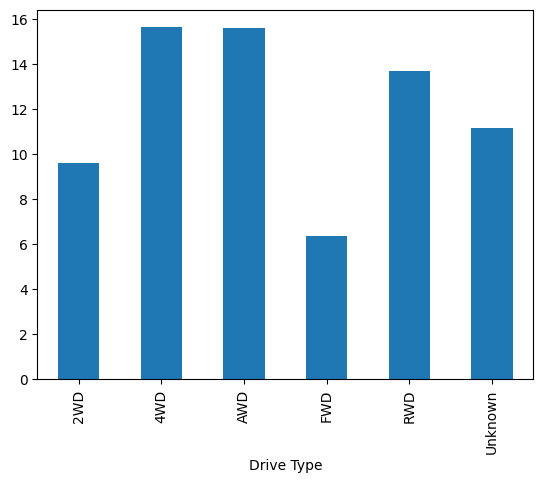

In [14]:
df.groupby(['Drive Type'])['price_in_lakhs_winzorized'].mean().plot.bar();

In [15]:
categorical_cols = df.select_dtypes(include=['object']).columns
categorical_cols

Index(['Insurance Validity', 'Fuel Type', 'Engine Displacement', 'ft', 'bt',
       'transmission', 'oem', 'model', 'Color', 'Fuel Suppy System',
       'Turbo Charger', 'Gear Box', 'Drive Type', 'Steering Type', 'Tyre Type',
       'Value Configuration', 'Super Charger', 'City'],
      dtype='object')

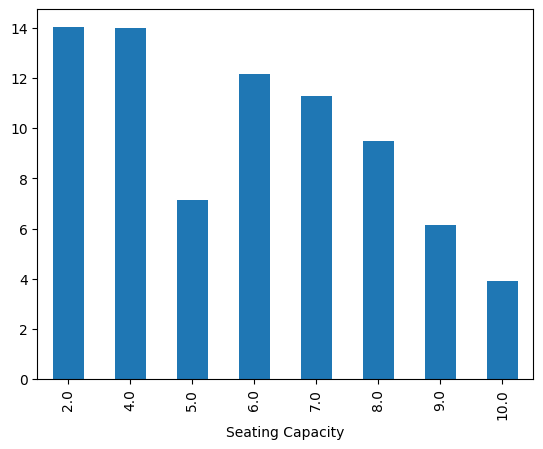

In [19]:
df.groupby(['Seating Capacity'])['price_in_lakhs_winzorized'].mean().plot.bar();

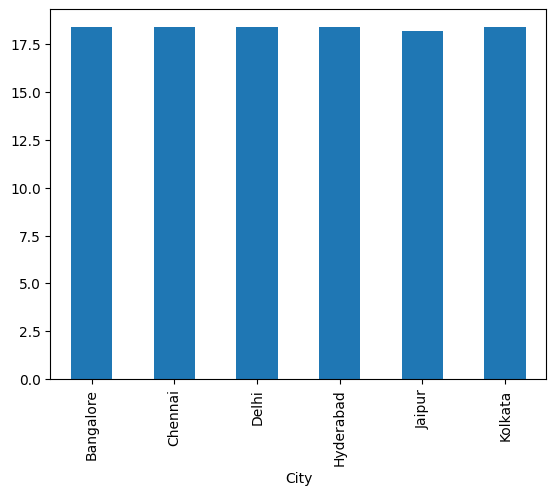

In [17]:
for col in categorical_cols:
    df.groupby(col)['price_in_lakhs_winzorized'].mean().plot.bar()